# TILEs
Scripts to modify images with quadtrees, voronoitrees, dithering algorithms, etc...
Images must be open with PIL. The scripts output a dict containing all the needed informations to reconstruct polygons, but the images as well.
It was originally written for PILes, to manipulate images.

In [1]:
import TILEs
from PIL import Image
from copy import deepcopy
import matplotlib.pyplot as plt

from matplotlib.collections import PolyCollection, LineCollection

%matplotlib inline

As an example, let's open a picture: 

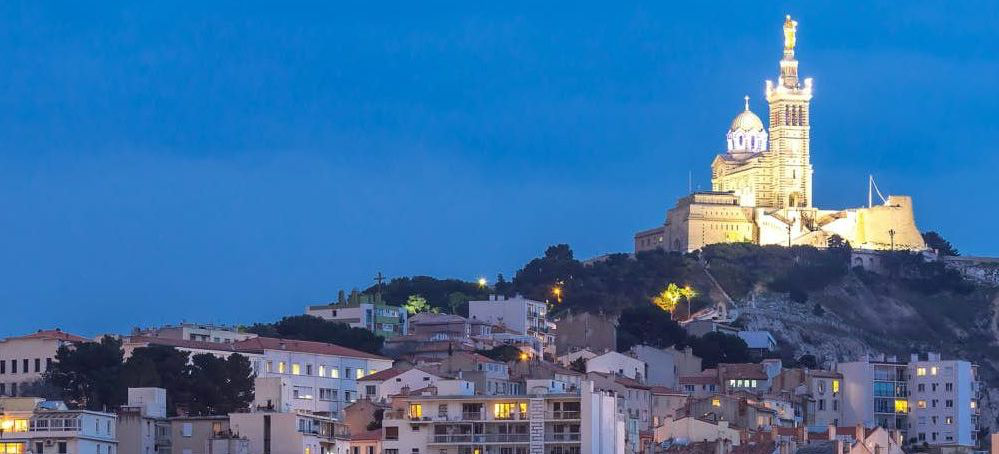

In [2]:
img_link = 'Marseille3.jpg'
img = Image.open(img_link).convert('RGB')
display(img)

## Dithering
As a really simple script, we can apply ditehring filter to this image.
Available dithering kernels are Floyd-Steinberg, Jarvis-Judis-Ninke, Stucki, Atkinson. But you can add yours.

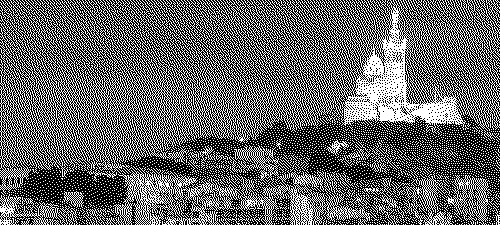

In [3]:
# resizing for convenience. nc for the number of colors.
dither = TILEs.dither(img.resize((500, 225)), nc=2) 
display(dither)

## Quadtrees
Images can be filtered with recursive quadtrees, depending on the local standard deviation.


In [4]:
# std_thr is the standard deviation threshold when the recursion will stop. max_level is max recursion level allowed
quads = TILEs.quadtree(img, std_thr=40, max_level=7)

In [5]:
# quads is a dict:
quads.keys()

dict_keys(['top', 'left', 'x', 'y', 'width', 'height', 'colors', 'level', 'polys'])

In [37]:
# Conversion RGB uint to float for matplotlib
quad_colors = [(r/255, g/255, b/255) for r, g, b in quads['colors']]

# Two collections, with black edges and without.
quad_coll = PolyCollection(quads['polys'], 
                           edgecolors='black', linewidths=0.5,
                           facecolors=quad_colors, alpha=1)
quad_coll2 = PolyCollection(quads['polys'], 
                            edgecolors=quad_colors, linewidths=1,
                            facecolors=quad_colors, alpha=1)

In [38]:
# some functions to show the images
def set_ax(ax):
    ax.axis('off') 
    ax.set_xlim(0, 999) # image dimensions
    ax.set_ylim(454, 0) # remember that images have inverted y-axis
    ax.set_aspect('equal')
    
    return ax

def show_collections(collections):
    fig, axes = plt.subplots(figsize=(16,8), ncols=2, nrows=int(len(collections) / 2))
    ax = axes.ravel()

    for i, coll in enumerate(collections):

        ax[i] = set_ax(ax[i])
        ax[i].add_collection(deepcopy(coll))

    fig.tight_layout(pad=0.2)
    

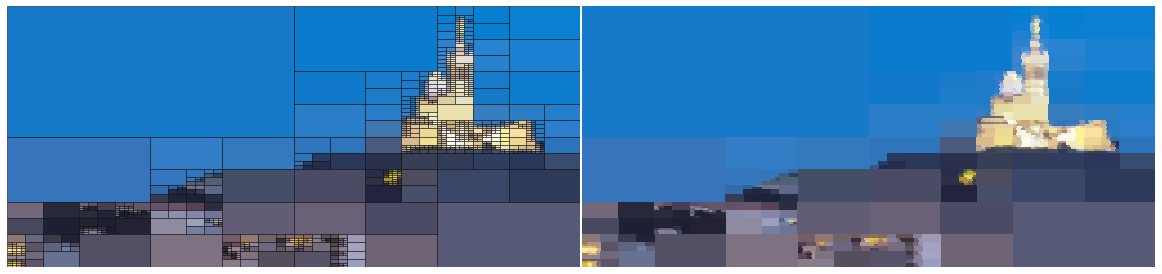

In [39]:
# Displaying the images after quadtree
show_collections([quad_coll, quad_coll2])

## Voronoitrees
Images can be filtered with recursive Voronoi separation, depending on the local standard deviation as well.

In [10]:
vors = TILEs.voronoitree(img, std_thr=40)

In [40]:
vor_colors = [(r/255, g/255, b/255) for r, g, b in vors['colors']]

vor_coll = PolyCollection(vors['polys'], 
                          edgecolors='black', linewidths=0.5,
                          facecolors=vor_colors, alpha=1)
vor_coll2 = PolyCollection(vors['polys'], 
                           edgecolors=vor_colors, linewidths=1,
                           facecolors=vor_colors, alpha=1)

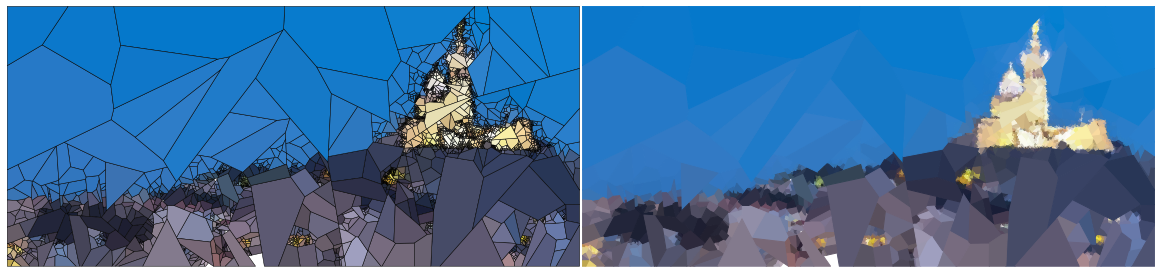

In [41]:
show_collections([vor_coll, vor_coll2])

## Recursive slicing
Images can be recursively sliced as well: each step, a random point is chosen in the image and the image sliced vertically or horizontally from this point. This gives a messier Quadtree effect.

In [44]:
slices = TILEs.recursive_slice(img, std_thr=20, max_level=20)

In [45]:
slices_colors = [(r/255, g/255, b/255) for r, g, b in slices['colors']]

slices_coll = PolyCollection(slices['polys'], 
                             edgecolors='black', linewidths=0.5,
                             facecolors=slices_colors, alpha=1)
slices_coll2 = PolyCollection(slices['polys'], 
                              edgecolors=slices_colors, linewidths=1,
                              facecolors=slices_colors, alpha=1)

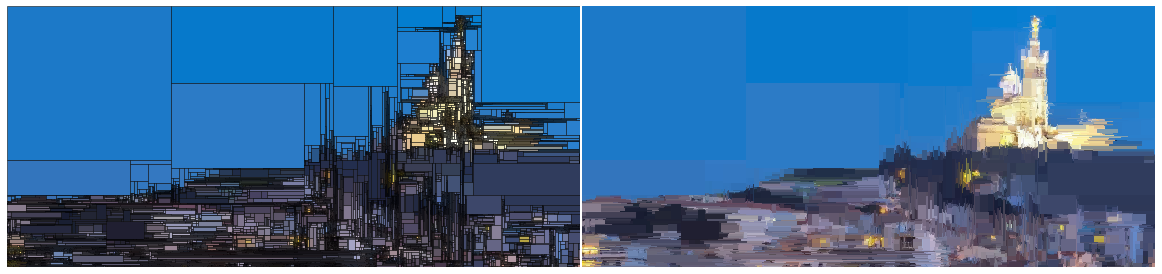

In [46]:
show_collections([slices_coll, slices_coll2])

## Adding a heightmap
All functions accept a heightmap to modify the strength of the effect.

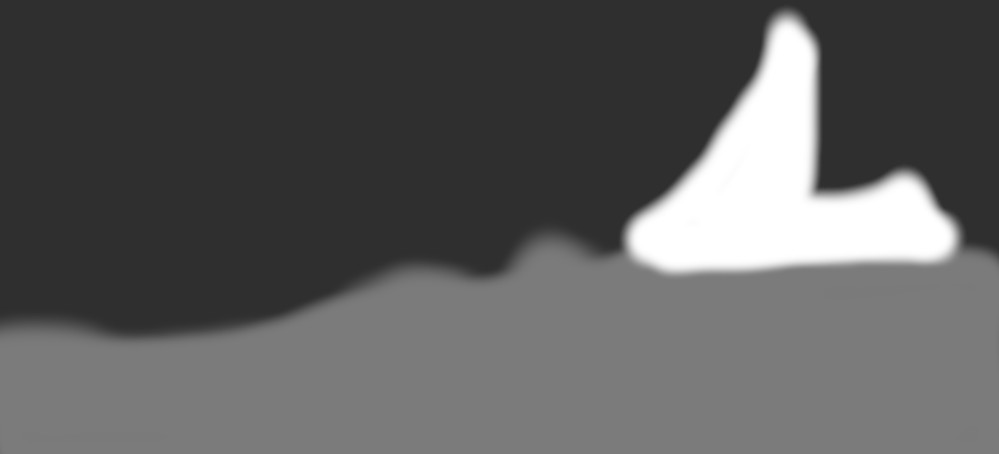

In [12]:
hmap_link = 'Marseille3_hmap.jpg'
hmap = Image.open(hmap_link).convert('L')
display(hmap)

In [13]:
# With std_thr=0, the function will only use the heightmap
quads2 = TILEs.quadtree(img, std_thr=0, max_level=7, heightmap=hmap)

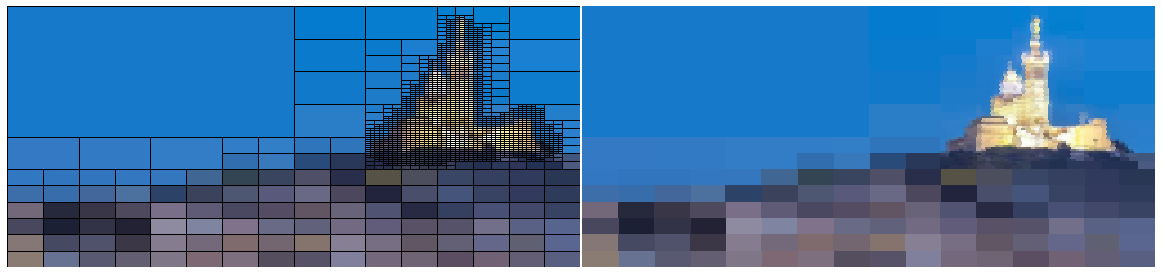

In [14]:
quad_colors = [(r/255, g/255, b/255) for r, g, b in quads2['colors']]

quad_collb = PolyCollection(quads2['polys'], edgecolors='black', facecolors=quad_colors, alpha=1)
quad_collb2 = PolyCollection(quads2['polys'], edgecolors=quad_colors, facecolors=quad_colors, alpha=1)

show_collections([quad_collb, quad_collb2])

In [15]:
vors2 = TILEs.voronoitree(img, std_thr=0, max_level=4, heightmap=hmap)

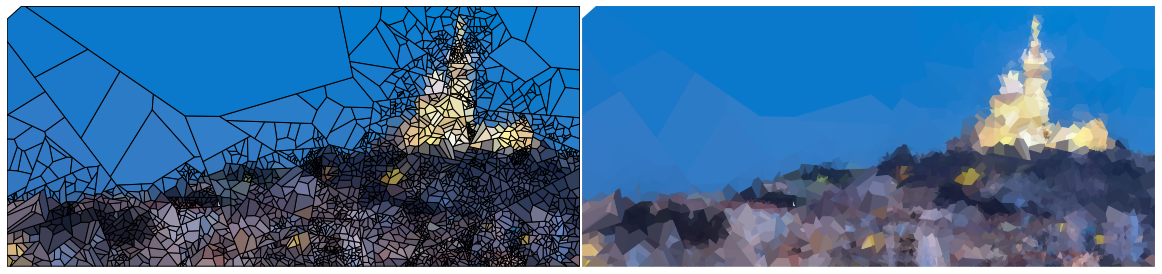

In [16]:
vor_colors = [(r/255, g/255, b/255) for r, g, b in vors2['colors']]

vor_collb = PolyCollection(vors2['polys'], edgecolors='black', facecolors=vor_colors, alpha=1)
vor_collb2 = PolyCollection(vors2['polys'], edgecolors=vor_colors, facecolors=vor_colors, alpha=1)

show_collections([vor_collb, vor_collb2])

## Random polygons
Functions that will generate n_corners polygons in random locations on the image. 
Similar to the other functions, it accepts a a heightmap to set the density of points.

In [31]:
# left with random positions of the polygons, right with a heightmap that will set the density of points.
polys = TILEs.throw_polys(img, n_points=20_000, distance=20)
polys2 = TILEs.throw_polys(img, n_points=20_000, heightmap=hmap, distance=10)

poly_colors = [(r/255, g/255, b/255) for r, g, b in polys['colors']]
poly_colors2 = [(r/255, g/255, b/255) for r, g, b in polys2['colors']]

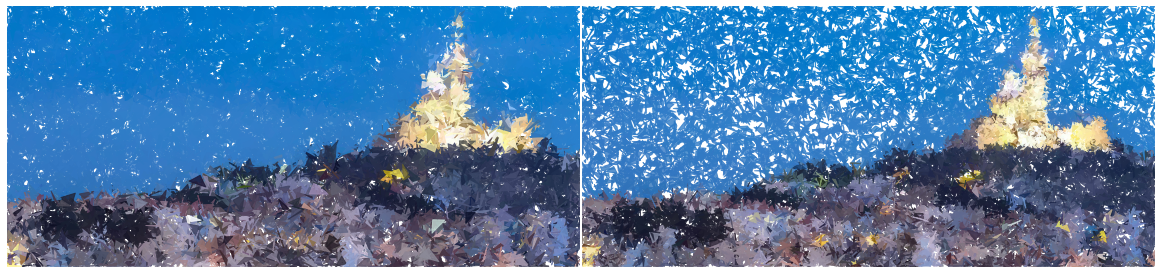

In [32]:
poly_coll = PolyCollection(polys['polys'], edgecolors=poly_colors, facecolors=poly_colors, alpha=0.8)
poly_coll2 = PolyCollection(polys2['polys'], edgecolors=poly_colors2, facecolors=poly_colors2, alpha=0.8)
show_collections([poly_coll, poly_coll2])